In [ ]:
#https://github.com/jleuschen17

# Homework I: Curve Fitting
### Joseph Leuschen jleusche@uw.edu 2162382
The first assignment for EE 399: Special Topics in Electrical Engineering: Machine Learning for Science and Engineering. The assignment focuses around curve fitting and different algorithms for calculating parameter values and error. The assignment uses an artificial dataset and multiple different curve fitting techniques to attempt to generalize the data. The first part of the assignment uses a cosine signal to describe the signal while the second part uses polynomials. In both parts a least squared error metric is used to quantify how accurate different models are.

## Section I: Introduction and Overview
This project is centered around the exploration and analysis of curve-fitting techniques applied to a given dataset. The goal is to understand the impact of varying model complexity and training data distribution on the performance of the fitted model. By using a least-squares error approach, I analyzed different models, including a cosine function, linear regression, parabolic fit, and a high-degree polynomial fit. This exercise allowed me to gain hands-on experience with model optimization, parameter sweeping, and error evaluation, while simultaneously developing their understanding of overfitting, underfitting, and generalization in the context of data modeling.

## Section II: Theoretical Background
This project focuses on curve-fitting techniques, which combine mathematical modeling, optimization, and statistical analysis to find the best functional representation of a given dataset. Theoretical aspects include the least-squares error, model complexity, training and test data partitioning, parameter optimization, and error landscape visualization. The objective is to strike a balance between model complexity and generalization while minimizing error.

## Section III Algorithm Implementation and Development
In this project, I implemented an algorithm to fit a given model to a dataset using the least-squares error. The model is defined as f(x) = A * cos(Bx) + Cx + D. The algorithm identifies the parameters A, B, C, and D that minimize the error. It then generates 2D loss landscapes by fixing two parameters and sweeping the other two, allowing us to visualize local minima. Next, the algorithm fits linear, parabolic, and 19th-degree polynomial models to the first 20 data points and compares the least-square errors for both training and test sets. Finally, it repeats the process using the first 10 and last 10 data points as training data and evaluates the performance on the held-out middle data points.

## Section IV: Computational Results
I found the cosine based curve fit to generate the most accurate results as it generated the lowest least squared error of 1.74 when applied to the entire dataset. In the first curve fit the 19th degree polynomial produced an extremely low error value when tested against training points but an extremely large value when tested against test values. The line and parabola scored similar error values when tetsed against training values but the line was much more accurate against the test values. In the second curve fit, the 19th degree polynomial showed similar results with a low training error but high test error--though not as bad as the first fit. The parabola and line showed similar results to one another scoring around 1.5 on training and 2.5 on testing.

## Section 5: Summary and Conclusions
In this project, I explored curve-fitting techniques using least-squares error to find the best functional representation for a given dataset. Various models were tested, including a cosine function, linear regression, parabolic fit, and a high-degree polynomial fit. The cosine-based curve fit generated the most accurate results with the lowest least squared error. The high-degree polynomial fit displayed overfitting issues, having low error on the training set but high error on the test set. The linear and parabolic fits showed better generalization. Overall, the project provided valuable insights into model optimization, overfitting, underfitting, and generalization in data modeling.





In [65]:
#modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import math


In [66]:
#Part II (i)
X = np.arange(0, 31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

In [67]:
def model(x, A, B, C, D):
    return A * np.cos(B*x) + C*x + D

def error(params, x, y):
    A, B, C, D = params
    pred = model(x, A, B, C, D)
    errors2 = (pred - y) ** 2
    return math.sqrt(np.sum(errors2) / len(x))


In [68]:
initials = [1, 1, 1, 1]
result = scipy.optimize.minimize(error, initials, args=(X, Y))

In [69]:
newYs = model(X, result.x[0], result.x[1], result.x[2], result.x[3])

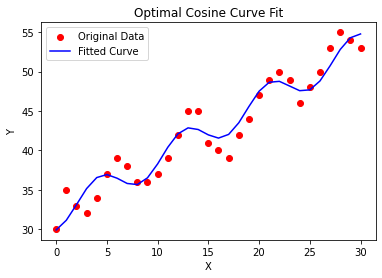

In [70]:
plt.scatter(X, Y, color='r', label = "Original Data")
plt.plot(X, newYs, color='b', label="Fitted Curve")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Optimal Cosine Curve Fit")
plt.legend(loc="upper left")

In [71]:
A, B, C, D = result.x
optimal_params = result.x
names = ["A", "B", "C", "D"]
for i in range(4):
    print(f"Optimal {names[i]}: {result.x[i]}")
print(error(result.x, X, Y))

Optimal A: -1.9101670177125587
Optimal B: -0.7510349658797968
Optimal C: 0.7109310131770017
Optimal D: 31.816372385575157
1.7394055581144567


Local minima for sweeping A and B: 46
Local minima for sweeping A and C: 84
Local minima for sweeping A and D: 164
Local minima for sweeping B and C: 78
Local minima for sweeping B and D: 134
Local minima for sweeping C and D: 134


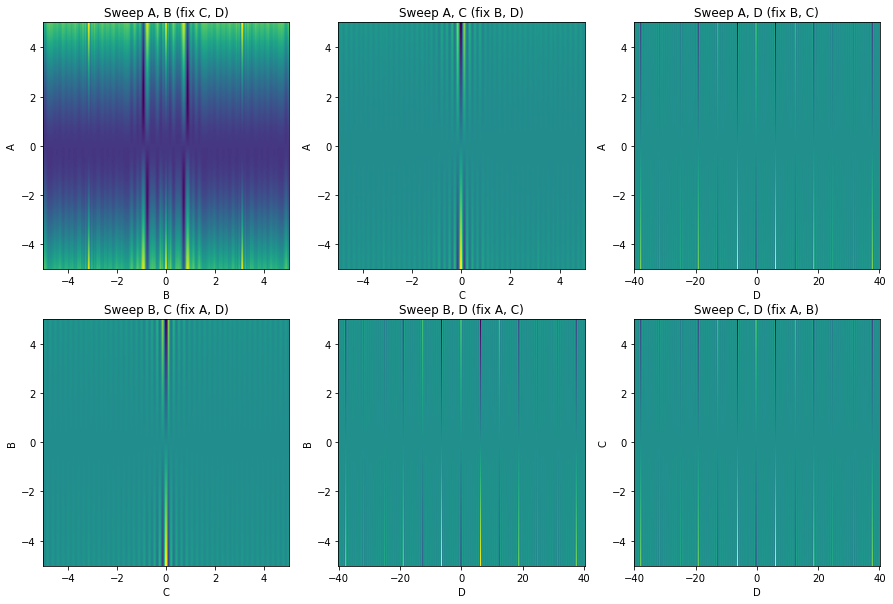

In [72]:
#Part II (ii)
def generate_error_values(swept_ranges, fixed_params):
    range1, range2 = swept_ranges
    param1_fixed, param2_fixed = fixed_params

    error_values = np.zeros((len(range1), len(range2)))

    for i, val1 in enumerate(range1):
        for j, val2 in enumerate(range2):
            error_values[i, j] = error([val1, val2, param1_fixed, param2_fixed], X, Y)

    return error_values

def calc_local_minima(error_values):
    count = 0
    rows, cols = error_values.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            mid = error_values[i, j]
            nextTo = [error_values[i - 1, j - 1], error_values[i - 1, j],
                       error_values[i - 1, j + 1], error_values[i, j - 1],
                       error_values[i, j + 1], error_values[i + 1, j - 1],
                       error_values[i + 1, j], error_values[i + 1, j + 1]]
            if mid < min(nextTo):
                count += 1
    return count

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
A_range = np.linspace(-5, 5, 250)
B_range = np.linspace(-5, 5, 250)
C_range = np.linspace(-5, 5, 250)
D_range = np.linspace(-40, 40, 250)


error_values = generate_error_values((A_range, B_range), (C, D))
axs[0, 0].pcolor(B_range, A_range, error_values, cmap='viridis', shading='auto')
axs[0, 0].set_title('Sweep A, B (fix C, D)')
axs[0, 0].set_xlabel('B')
axs[0, 0].set_ylabel('A')
print(f"Local minima for sweeping A and B: {calc_local_minima(error_values)}")


error_values = generate_error_values((A_range, C_range), (B, D))
axs[0, 1].pcolor(C_range, A_range, error_values, cmap='viridis', shading='auto')
axs[0, 1].set_title('Sweep A, C (fix B, D)')
axs[0, 1].set_xlabel('C')
axs[0, 1].set_ylabel('A')
print(f"Local minima for sweeping A and C: {calc_local_minima(error_values)}")


error_values = generate_error_values((A_range, D_range), (B, C))
axs[0, 2].pcolor(D_range, A_range, error_values, cmap='viridis', shading='auto')
axs[0, 2].set_title('Sweep A, D (fix B, C)')
axs[0, 2].set_xlabel('D')
axs[0, 2].set_ylabel('A')
print(f"Local minima for sweeping A and D: {calc_local_minima(error_values)}")

error_values = generate_error_values((B_range, C_range), (A, D))
axs[1, 0].pcolor(C_range, B_range, error_values, cmap='viridis', shading='auto')
axs[1, 0].set_title('Sweep B, C (fix A, D)')
axs[1, 0].set_xlabel('C')
axs[1, 0].set_ylabel('B')
print(f"Local minima for sweeping B and C: {calc_local_minima(error_values)}")

error_values = generate_error_values((B_range, D_range), (A, C))
axs[1, 1].pcolor(D_range, B_range, error_values, cmap='viridis', shading='auto')
axs[1, 1].set_title('Sweep B, D (fix A, C)')
axs[1, 1].set_xlabel('D')
axs[1, 1].set_ylabel('B')
print(f"Local minima for sweeping B and D: {calc_local_minima(error_values)}")

error_values = generate_error_values((C_range, D_range), (A, B))
axs[1, 2].pcolor(D_range, C_range, error_values, cmap='viridis', shading='auto')
axs[1, 2].set_title('Sweep C, D (fix A, B)')
axs[1, 2].set_xlabel('D')
axs[1, 2].set_ylabel('C')
print(f"Local minima for sweeping C and D: {calc_local_minima(error_values)}")

In [73]:
#Part II (iii)
X_train = X[:20]
X_test = X[20:]
Y_train = Y[:20]
Y_test = Y[20:]

line = np.polyfit(X_train, Y_train, 1)
parabola = np.polyfit(X_train, Y_train, 2)
poly = np.polyfit(X_train, Y_train, 19)


C:\Users\jleus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [74]:
def calc_error(coeffs, X, Y):
    function = np.poly1d(coeffs)
    pred = function(X)
    errors2 = (pred - Y) ** 2
    return math.sqrt(np.sum(errors2) / len(X))

In [75]:
error_line_train = calc_error(line, X_train, Y_train)
error_parabola_train = calc_error(parabola, X_train, Y_train)
error_poly_train = calc_error(poly, X_train, Y_train)
error_line_test = calc_error(line, X_test, Y_test)
error_parabola_test = calc_error(parabola, X_test, Y_test)
error_poly_test = calc_error(poly, X_test, Y_test)
error_vals = [error_line_train, error_parabola_train, error_poly_train,
              error_line_test, error_parabola_test, error_poly_test]
names2 = ["Line (Train)", "Parabola (Train)", "Polynomial (Train)",
          "Line (Test)", "Parabola (Test)", "Polynomial (Test)"]
for i in range(6):
    print(f"Error for {names2[i]}: {error_vals[i]}")



Error for Line (Train): 2.242749386808538
Error for Parabola (Train): 2.1255393482773766
Error for Polynomial (Train): 0.028351503968806435
Error for Line (Test): 3.36363873604787
Error for Parabola (Test): 8.713651781874919
Error for Polynomial (Test): 28617752784.428474


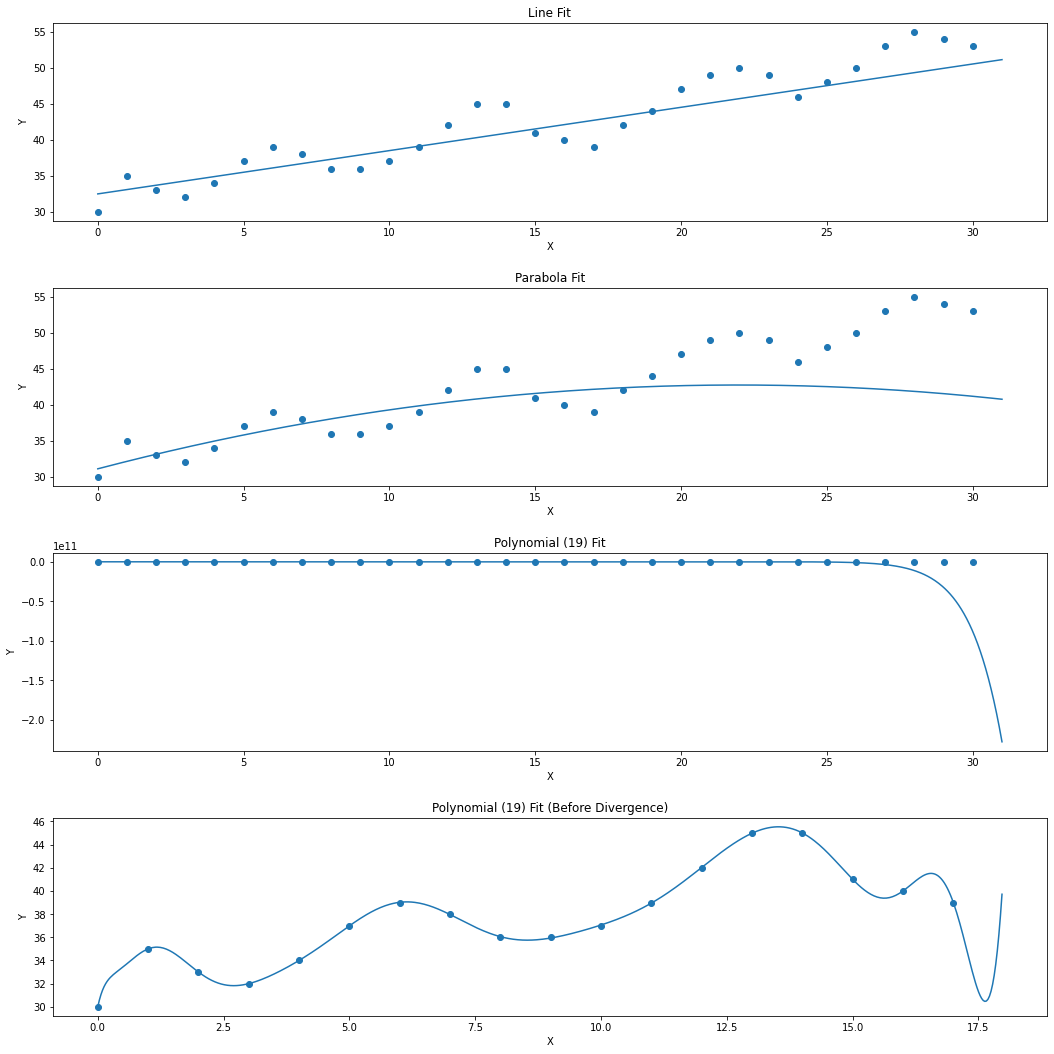

In [76]:
funcLine = np.poly1d(line)
funcParabola = np.poly1d(parabola)
funcPoly = np.poly1d(poly)
yPredLine = funcLine(np.linspace(0, 31, 1000))
yPredParabola = funcParabola(np.linspace(0, 31, 1000))
yPredPoly = funcPoly(np.linspace(0, 31, 1000))
fig, axs = plt.subplots(4, figsize=(15, 15))
for i in range(3):
    axs[i].scatter(X, Y)
axs[0].plot(np.linspace(0, 31, 1000), yPredLine)
axs[1].plot(np.linspace(0, 31, 1000), yPredParabola)
axs[2].plot(np.linspace(0, 31, 1000), yPredPoly)
axs[3].scatter(X[:18], Y[:18])
axs[3].plot(np.linspace(0, 31, 1000)[:580], yPredPoly[:580])
for i in range(4):
    axs[i].set_xlabel("X")
    axs[i].set_ylabel("Y")
axs[0].set_title("Line Fit")
axs[1].set_title("Parabola Fit")
axs[2].set_title("Polynomial (19) Fit")
axs[3].set_title("Polynomial (19) Fit (Before Divergence)")
fig.tight_layout(pad=2)

In [77]:
#Part II (iv)
X_train2 = X[:10]
X_train2 = np.concatenate((X_train2, X[21:]))
Y_train2 = Y[:10]
Y_train2 = np.concatenate((Y_train2, Y[21:]))
X_test2 = X[10:21]
Y_test2 = Y[10:21]
line2 = np.polyfit(X_train2, Y_train2, 1)
parabola2 = np.polyfit(X_train2, Y_train2, 2)
poly2 = np.polyfit(X_train2, Y_train2, 19)

C:\Users\jleus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [78]:
error_line_train2 = calc_error(line2, X_train2, Y_train2)
error_parabola_train2 = calc_error(parabola2, X_train2, Y_train2)
error_poly_train2 = calc_error(poly2, X_train2, Y_train2)
error_line_test2 = calc_error(line2, X_test2, Y_test2)
error_parabola_test2 = calc_error(parabola2, X_test2, Y_test2)
error_poly_test2 = calc_error(poly2, X_test2, Y_test2)
error_vals = [error_line_train2, error_parabola_train2, error_poly_train2,
              error_line_test2, error_parabola_test2, error_poly_test2]
names3 = ["Line (Train)", "Parabola (Train)", "Polynomial (Train)",
          "Line (Test)", "Parabola (Test)", "Polynomial (Test)"]
for i in range(6):
    print(f"Error for {names2[i]}: {error_vals[i]}")

Error for Line (Train): 1.851669904329375
Error for Parabola (Train): 1.8508364115957907
Error for Polynomial (Train): 0.1638133765080727
Error for Line (Test): 2.8065076975181618
Error for Parabola (Test): 2.774982896893291
Error for Polynomial (Test): 483.9099124568562


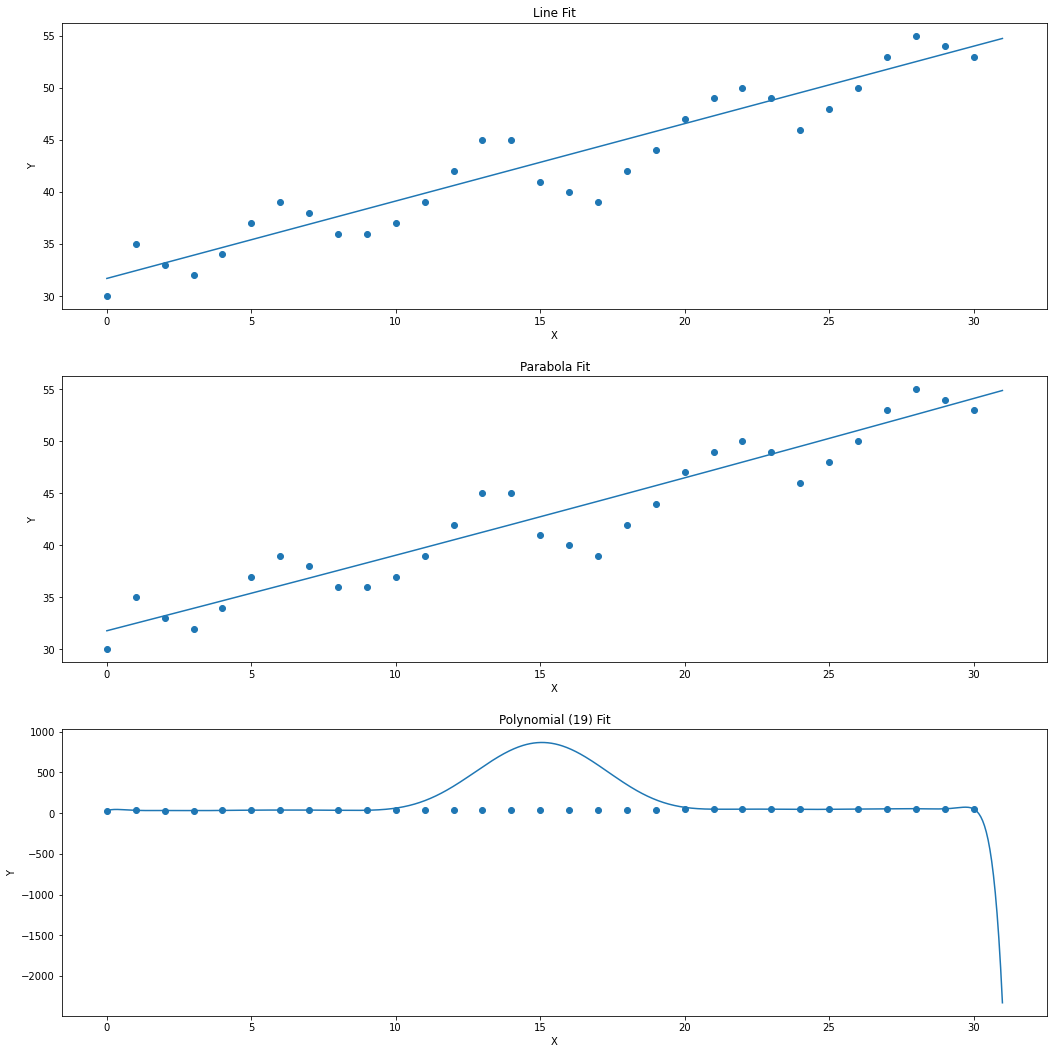

In [79]:
funcLine2 = np.poly1d(line2)
funcParabola2 = np.poly1d(parabola2)
funcPoly2 = np.poly1d(poly2)
yPredLine2 = funcLine2(np.linspace(0, 31, 1000))
yPredParabola2 = funcParabola2(np.linspace(0, 31, 1000))
yPredPoly2 = funcPoly2(np.linspace(0, 31, 1000))
fig, axs = plt.subplots(3, figsize=(15, 15))
for i in range(3):
    axs[i].scatter(X, Y)
axs[0].plot(np.linspace(0, 31, 1000), yPredLine2)
axs[1].plot(np.linspace(0, 31, 1000), yPredParabola2)
axs[2].plot(np.linspace(0, 31, 1000), yPredPoly2)
for i in range(3):
    axs[i].set_xlabel("X")
    axs[i].set_ylabel("Y")
axs[0].set_title("Line Fit")
axs[1].set_title("Parabola Fit")
axs[2].set_title("Polynomial (19) Fit")
fig.tight_layout(pad=2)